In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import matplotlib.dates as mdates


In [10]:
diepkloof_df = pd.read_csv("CleanDatasets/diepkloof_AQI.csv")
diepkloof_df = diepkloof_df.sort_values("date")

# diepkloof_df.dtypes
diepkloof_df["date"] = pd.to_datetime(diepkloof_df["date"])
diepkloof_df

,date,pm25,pm10,o3,no2,so2,co,AQI
370,2019-02-01,97,65,10,9,2,7,97
371,2019-02-02,129,52,9,7,2,6,129
372,2019-02-03,111,50,10,7,1,6,111
373,2019-02-05,90,46,11,10,2,7,90
374,2019-02-06,89,48,13,9,1,7,89
...,...,...,...,...,...,...,...,...
13,2020-07-18,119,68,13,13,8,9,119
14,2020-07-19,128,38,12,9,5,6,128
15,2020-07-20,96,37,16,11,3,7,96
16,2020-07-21,105,132,20,13,7,10,132


In [11]:
diepkloof_lockdown_df=diepkloof_df[(diepkloof_df['date']>='2020-03-26') & (diepkloof_df['date']<='2020-04-30')]
diepkloof_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI
109,2020-03-26,51,15,10,8,1,4,51
110,2020-03-27,57,23,10,5,1,2,57
111,2020-03-28,59,14,8,3,1,2,59
112,2020-03-29,54,26,8,3,1,3,54
113,2020-03-30,62,18,6,6,1,3,62
114,2020-03-31,59,26,7,7,1,3,59
115,2020-04-01,70,18,6,5,1,3,70
73,2020-04-02,68,10,4,5,4,2,68
74,2020-04-03,36,14,4,6,1,3,36
75,2020-04-04,38,22,4,8,1,4,38


In [12]:
diepkloof_lockdown_df = diepkloof_lockdown_df.set_index("date")
diepkloof_lockdown_df

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-26,51,15,10,8,1,4,51
2020-03-27,57,23,10,5,1,2,57
2020-03-28,59,14,8,3,1,2,59
2020-03-29,54,26,8,3,1,3,54
2020-03-30,62,18,6,6,1,3,62
2020-03-31,59,26,7,7,1,3,59
2020-04-01,70,18,6,5,1,3,70
2020-04-02,68,10,4,5,4,2,68
2020-04-03,36,14,4,6,1,3,36


In [13]:
diepkloof_df = diepkloof_df.set_index("date")
diepkloof_df

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-02-01,97,65,10,9,2,7,97
2019-02-02,129,52,9,7,2,6,129
2019-02-03,111,50,10,7,1,6,111
2019-02-05,90,46,11,10,2,7,90
2019-02-06,89,48,13,9,1,7,89
...,...,...,...,...,...,...,...
2020-07-18,119,68,13,13,8,9,119
2020-07-19,128,38,12,9,5,6,128
2020-07-20,96,37,16,11,3,7,96


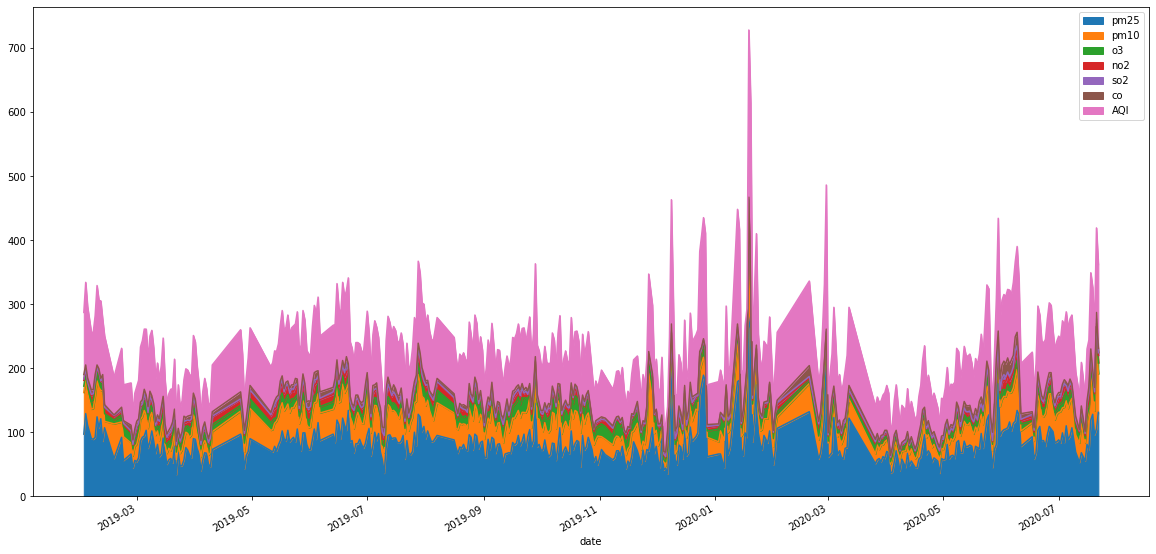

In [14]:
ax = diepkloof_df.plot.area(figsize=(20,10))


In [15]:
diepkloof_quartiles = diepkloof_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lowerq = diepkloof_quartiles[0.25]

# Compute the upper quartile
diepkloof_upperq = diepkloof_quartiles[0.75]
diepkloof_iqr = diepkloof_upperq-diepkloof_lowerq
print(f"The lower quartile of diepkloof  is: {diepkloof_lowerq}")
print(f"The upper quartile of diepkloof is: {diepkloof_upperq}")
print(f"The interquartile range of diepkloof is: {diepkloof_iqr}")
lower_bound = diepkloof_lowerq - (1.5*diepkloof_iqr)
upper_bound = diepkloof_upperq + (1.5*diepkloof_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof = diepkloof_df.loc[(diepkloof_df["pm25"] < lower_bound) | (diepkloof_df["pm25"] > upper_bound)]
outlier_diepkloof

The lower quartile of diepkloof  is: 65.5
The upper quartile of diepkloof is: 94.0
The interquartile range of diepkloof is: 28.5
Values below 22.75 could be outliers.
Values above 136.75 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-09-28,145,32,21,12,2,6,145
2019-12-09,194,46,5,10,2,12,194
2019-12-24,156,40,14,9,1,6,156
2019-12-25,174,33,17,5,1,3,174
2019-12-26,189,28,21,5,1,2,189
2019-12-27,180,24,19,5,1,2,180
2020-01-13,179,59,16,6,4,5,179
2020-01-14,181,27,17,5,2,4,181
2020-01-19,261,187,9,5,2,3,261


In [16]:
diepkloof_quartiles = diepkloof_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lowerq = diepkloof_quartiles[0.25]

# Compute the upper quartile
diepkloof_upperq = diepkloof_quartiles[0.75]
diepkloof_iqr = diepkloof_upperq-diepkloof_lowerq
print(f"The lower quartile of diepkloof  is: {diepkloof_lowerq}")
print(f"The upper quartile of diepkloof is: {diepkloof_upperq}")
print(f"The interquartile range of diepkloof is: {diepkloof_iqr}")
lower_bound = diepkloof_lowerq - (1.5*diepkloof_iqr)
upper_bound = diepkloof_upperq + (1.5*diepkloof_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof = diepkloof_df.loc[(diepkloof_df["pm10"] < lower_bound) | (diepkloof_df["pm10"] > upper_bound)]
outlier_diepkloof

The lower quartile of diepkloof  is: 26.0
The upper quartile of diepkloof is: 45.0
The interquartile range of diepkloof is: 19.0
Values below -2.5 could be outliers.
Values above 73.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-02-11,86,79,11,7,1,6,86
2019-11-27,71,121,19,10,1,4,121
2020-01-18,92,79,19,6,1,4,92
2020-01-19,261,187,9,5,2,3,261
2020-05-29,81,94,1,12,5,21,94
2020-07-21,105,132,20,13,7,10,132


In [17]:
diepkloof_quartiles = diepkloof_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lowerq = diepkloof_quartiles[0.25]

# Compute the upper quartile
diepkloof_upperq = diepkloof_quartiles[0.75]
diepkloof_iqr = diepkloof_upperq-diepkloof_lowerq
print(f"The lower quartile of diepkloof  is: {diepkloof_lowerq}")
print(f"The upper quartile of diepkloof is: {diepkloof_upperq}")
print(f"The interquartile range of diepkloof is: {diepkloof_iqr}")
lower_bound = diepkloof_lowerq - (1.5*diepkloof_iqr)
upper_bound = diepkloof_upperq + (1.5*diepkloof_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof = diepkloof_df.loc[(diepkloof_df["o3"] < lower_bound) | (diepkloof_df["o3"] > upper_bound)]
outlier_diepkloof

The lower quartile of diepkloof  is: 10.0
The upper quartile of diepkloof is: 16.0
The interquartile range of diepkloof is: 6.0
Values below 1.0 could be outliers.
Values above 25.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-10-17,102,33,26,8,4,4,102


In [18]:
diepkloof_quartiles = diepkloof_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lowerq = diepkloof_quartiles[0.25]

# Compute the upper quartile
diepkloof_upperq = diepkloof_quartiles[0.75]
diepkloof_iqr = diepkloof_upperq-diepkloof_lowerq
print(f"The lower quartile of diepkloof  is: {diepkloof_lowerq}")
print(f"The upper quartile of diepkloof is: {diepkloof_upperq}")
print(f"The interquartile range of diepkloof is: {diepkloof_iqr}")
lower_bound = diepkloof_lowerq - (1.5*diepkloof_iqr)
upper_bound = diepkloof_upperq + (1.5*diepkloof_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof = diepkloof_df.loc[(diepkloof_df["no2"] < lower_bound) | (diepkloof_df["no2"] > upper_bound)]
outlier_diepkloof

The lower quartile of diepkloof  is: 6.0
The upper quartile of diepkloof is: 11.0
The interquartile range of diepkloof is: 5.0
Values below -1.5 could be outliers.
Values above 18.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-06-20,103,64,8,19,14,10,103


In [19]:
diepkloof_quartiles = diepkloof_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lowerq = diepkloof_quartiles[0.25]

# Compute the upper quartile
diepkloof_upperq = diepkloof_quartiles[0.75]
diepkloof_iqr = diepkloof_upperq-diepkloof_lowerq
print(f"The lower quartile of diepkloof  is: {diepkloof_lowerq}")
print(f"The upper quartile of diepkloof is: {diepkloof_upperq}")
print(f"The interquartile range of diepkloof is: {diepkloof_iqr}")
lower_bound = diepkloof_lowerq - (1.5*diepkloof_iqr)
upper_bound = diepkloof_upperq + (1.5*diepkloof_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof = diepkloof_df.loc[(diepkloof_df["so2"] < lower_bound) | (diepkloof_df["so2"] > upper_bound)]
outlier_diepkloof

The lower quartile of diepkloof  is: 1.0
The upper quartile of diepkloof is: 3.0
The interquartile range of diepkloof is: 2.0
Values below -2.0 could be outliers.
Values above 6.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-03-14,66,37,12,11,7,5,66
2019-03-15,91,36,6,10,9,4,91
2019-03-16,69,12,3,12,11,6,69
2019-05-14,71,46,5,16,11,6,71
2019-06-02,89,44,12,14,7,10,89
2019-06-03,105,41,11,16,9,11,105
2019-06-15,119,50,13,15,7,9,119
2019-06-19,111,50,11,14,7,7,111
2019-06-20,103,64,8,19,14,10,103


In [20]:
diepkloof_quartiles = diepkloof_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lowerq = diepkloof_quartiles[0.25]

# Compute the upper quartile
diepkloof_upperq = diepkloof_quartiles[0.75]
diepkloof_iqr = diepkloof_upperq-diepkloof_lowerq
print(f"The lower quartile of diepkloof  is: {diepkloof_lowerq}")
print(f"The upper quartile of diepkloof is: {diepkloof_upperq}")
print(f"The interquartile range of diepkloof is: {diepkloof_iqr}")
lower_bound = diepkloof_lowerq - (1.5*diepkloof_iqr)
upper_bound = diepkloof_upperq + (1.5*diepkloof_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof = diepkloof_df.loc[(diepkloof_df["co"] < lower_bound) | (diepkloof_df["co"] > upper_bound)]
outlier_diepkloof

The lower quartile of diepkloof  is: 4.0
The upper quartile of diepkloof is: 8.0
The interquartile range of diepkloof is: 4.0
Values below -2.0 could be outliers.
Values above 14.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-02-20,132,44,7,1,3,17,132
2020-05-28,73,36,12,5,4,19,73
2020-05-29,81,94,1,12,5,21,94
2020-05-30,176,41,6,9,8,18,176
2020-05-31,94,46,12,9,4,18,94
2020-06-01,101,50,15,12,6,21,101
2020-06-02,104,52,11,14,9,21,104
2020-06-03,105,50,9,15,7,21,105
2020-06-04,107,57,11,14,5,22,107


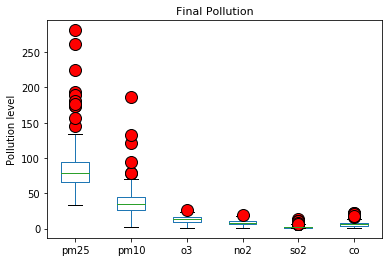

In [21]:


# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = diepkloof_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)

# Set the title and y axis label
box_plot.set_title('Final Pollution', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [22]:
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["pm25"] < lower_bound) | (diepkloof_lockdown_df["pm25"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 51.0
The upper quartile of diepkloof in lockdown is: 65.0
The interquartile range of diepkloof in lockdown is: 14.0
Values below 30.0 could be outliers.
Values above 86.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-04-21,96,23,9,6,1,4,96


In [23]:
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["pm10"] < lower_bound) | (diepkloof_lockdown_df["pm10"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 15.0
The upper quartile of diepkloof in lockdown is: 23.0
The interquartile range of diepkloof in lockdown is: 8.0
Values below 3.0 could be outliers.
Values above 35.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [24]:
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["o3"] < lower_bound) | (diepkloof_lockdown_df["o3"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 8.0
The upper quartile of diepkloof in lockdown is: 9.0
The interquartile range of diepkloof in lockdown is: 1.0
Values below 6.5 could be outliers.
Values above 10.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-30,62,18,6,6,1,3,62
2020-04-01,70,18,6,5,1,3,70
2020-04-02,68,10,4,5,4,2,68
2020-04-03,36,14,4,6,1,3,36
2020-04-04,38,22,4,8,1,4,38


In [25]:
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["no2"] < lower_bound) | (diepkloof_lockdown_df["no2"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 5.0
The upper quartile of diepkloof in lockdown is: 6.0
The interquartile range of diepkloof in lockdown is: 1.0
Values below 3.5 could be outliers.
Values above 7.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-26,51,15,10,8,1,4,51
2020-03-28,59,14,8,3,1,2,59
2020-03-29,54,26,8,3,1,3,54
2020-04-04,38,22,4,8,1,4,38
2020-04-08,40,19,8,3,1,2,40
2020-04-09,58,12,7,3,1,3,58
2020-04-28,55,10,8,3,1,6,55


In [26]:
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["so2"] < lower_bound) | (diepkloof_lockdown_df["so2"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 1.0
The upper quartile of diepkloof in lockdown is: 1.0
The interquartile range of diepkloof in lockdown is: 0.0
Values below 1.0 could be outliers.
Values above 1.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-04-02,68,10,4,5,4,2,68


In [27]:
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["co"] < lower_bound) | (diepkloof_lockdown_df["co"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 3.0
The upper quartile of diepkloof in lockdown is: 5.0
The interquartile range of diepkloof in lockdown is: 2.0
Values below 0.0 could be outliers.
Values above 8.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


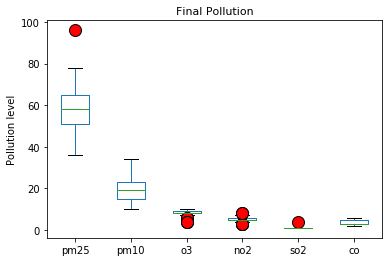

In [28]:


# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = diepkloof_lockdown_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)

# Set the title and y axis label
box_plot.set_title('Final Pollution', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [29]:
diepkloof_lockdown_df = diepkloof_lockdown_df.reset_index("date")
diepkloof_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2020-03-26,51,15,10,8,1,4,51
1,2020-03-27,57,23,10,5,1,2,57
2,2020-03-28,59,14,8,3,1,2,59
3,2020-03-29,54,26,8,3,1,3,54
4,2020-03-30,62,18,6,6,1,3,62
5,2020-03-31,59,26,7,7,1,3,59
6,2020-04-01,70,18,6,5,1,3,70
7,2020-04-02,68,10,4,5,4,2,68
8,2020-04-03,36,14,4,6,1,3,36
9,2020-04-04,38,22,4,8,1,4,38


In [30]:
diepkloof_lockdown_df["new_date"] = diepkloof_lockdown_df["date"].dt.strftime("%m-%d")
diepkloof_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2020-03-26,51,15,10,8,1,4,51,03-26
1,2020-03-27,57,23,10,5,1,2,57,03-27
2,2020-03-28,59,14,8,3,1,2,59,03-28
3,2020-03-29,54,26,8,3,1,3,54,03-29
4,2020-03-30,62,18,6,6,1,3,62,03-30
5,2020-03-31,59,26,7,7,1,3,59,03-31
6,2020-04-01,70,18,6,5,1,3,70,04-01
7,2020-04-02,68,10,4,5,4,2,68,04-02
8,2020-04-03,36,14,4,6,1,3,36,04-03
9,2020-04-04,38,22,4,8,1,4,38,04-04


In [31]:
diepkloof_df = diepkloof_df.reset_index("date")
diepkloof_df

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-02-01,97,65,10,9,2,7,97
1,2019-02-02,129,52,9,7,2,6,129
2,2019-02-03,111,50,10,7,1,6,111
3,2019-02-05,90,46,11,10,2,7,90
4,2019-02-06,89,48,13,9,1,7,89
...,...,...,...,...,...,...,...,...
414,2020-07-18,119,68,13,13,8,9,119
415,2020-07-19,128,38,12,9,5,6,128
416,2020-07-20,96,37,16,11,3,7,96
417,2020-07-21,105,132,20,13,7,10,132


In [32]:
diepkloof_2019_df=diepkloof_df[(diepkloof_df['date']>='2019-03-26') & (diepkloof_df['date']<='2019-04-30')]

diepkloof_2019_df["new_date"] = diepkloof_2019_df["date"].dt.strftime("%m-%d")
diepkloof_2019_df

C:\Users\spuna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
42,2019-03-26,57,30,15,12,4,7,57,03-26
43,2019-03-27,76,24,9,6,3,5,76,03-27
44,2019-03-28,72,26,12,7,2,6,72,03-28
45,2019-03-29,64,28,15,9,2,8,64,03-29
46,2019-03-30,60,36,13,9,3,6,60,03-30
47,2019-03-31,90,37,14,11,2,7,90,03-31
48,2019-04-01,89,30,12,11,1,9,89,04-01
49,2019-04-02,74,23,12,10,2,8,74,04-02
50,2019-04-03,67,14,12,7,1,6,67,04-03
51,2019-04-04,40,21,13,6,1,6,40,04-04


In [33]:
new_diepkloof_df = diepkloof_2019_df.merge(diepkloof_lockdown_df, on= "new_date")
new_diepkloof_df

,date_x,pm25_x,pm10_x,o3_x,no2_x,so2_x,co_x,AQI_x,new_date,date_y,pm25_y,pm10_y,o3_y,no2_y,so2_y,co_y,AQI_y
0,2019-03-26,57,30,15,12,4,7,57,03-26,2020-03-26,51,15,10,8,1,4,51
1,2019-03-27,76,24,9,6,3,5,76,03-27,2020-03-27,57,23,10,5,1,2,57
2,2019-03-28,72,26,12,7,2,6,72,03-28,2020-03-28,59,14,8,3,1,2,59
3,2019-03-29,64,28,15,9,2,8,64,03-29,2020-03-29,54,26,8,3,1,3,54
4,2019-03-30,60,36,13,9,3,6,60,03-30,2020-03-30,62,18,6,6,1,3,62
5,2019-03-31,90,37,14,11,2,7,90,03-31,2020-03-31,59,26,7,7,1,3,59
6,2019-04-01,89,30,12,11,1,9,89,04-01,2020-04-01,70,18,6,5,1,3,70
7,2019-04-02,74,23,12,10,2,8,74,04-02,2020-04-02,68,10,4,5,4,2,68
8,2019-04-03,67,14,12,7,1,6,67,04-03,2020-04-03,36,14,4,6,1,3,36
9,2019-04-04,40,21,13,6,1,6,40,04-04,2020-04-04,38,22,4,8,1,4,38


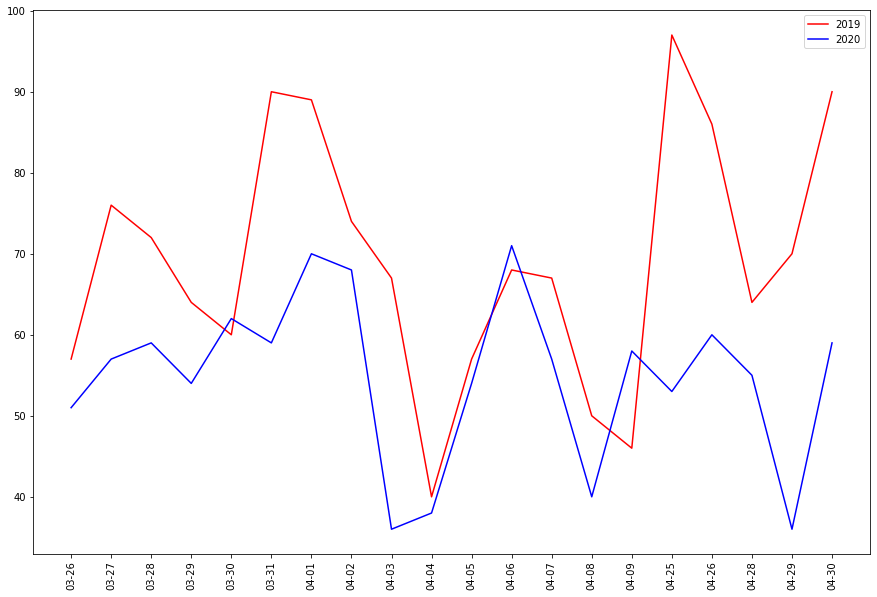

In [34]:
x_axis=new_diepkloof_df["new_date"]
y_axis=new_diepkloof_df["AQI_x"]
x2=new_diepkloof_df["new_date"]
y2=new_diepkloof_df["AQI_y"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
diepkloof_2019, = plt.plot(x_axis,y_axis, color="red", label="2019")
diepkloof_2020, = plt.plot(x2,y2,  color="blue", label="2020")

# Create a legend for our chart
plt.legend(handles=[diepkloof_2019, diepkloof_2020], loc="best")
plt.show()